## Imports

In [3]:
import numpy as np #Todo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# 1. Clustering

#### 1.1 In this part of the assignment you will be working with a very popular dataset in machine learning - IRIS. Use the [sqlite format of this dataset](https://drive.google.com/file/d/1F9h0SZbQj4TFk-loQwKF_XlZ-SGSyOVt/view?usp=sharing) to load the data in the notebook and convert it into a pandas dataframe. Refer to the video lectures to perform the necessary steps. [1 pt]

1. Import sqlite3
2. Create a conn object
3. Create a cursor

In [4]:
import os
data_iris_folder_content = os.listdir("iris")

In [5]:
import sqlite3
conn = sqlite3.connect('iris/database.sqlite') #create connection to db
cursor = conn.cursor()

In [6]:
# columns in our data
cursor.execute("SELECT name FROM sqlite_master").fetchall()

[('Iris',), ('movie',)]

In [7]:
iris_data = pd.read_sql_query ("SELECT * FROM Iris", conn)

1.2 Using the cursor, execute an SQL query that print the rows that have Petal Width greater than 2cm. [1 pt]

In [8]:
cursor.execute('SELECT * FROM Iris where PetalWidthCm > 2').fetchall()

[(101, 6.3, 3.3, 6, 2.5, 'Iris-virginica'),
 (103, 7.1, 3, 5.9, 2.1, 'Iris-virginica'),
 (105, 6.5, 3, 5.8, 2.2, 'Iris-virginica'),
 (106, 7.6, 3, 6.6, 2.1, 'Iris-virginica'),
 (110, 7.2, 3.6, 6.1, 2.5, 'Iris-virginica'),
 (113, 6.8, 3, 5.5, 2.1, 'Iris-virginica'),
 (115, 5.8, 2.8, 5.1, 2.4, 'Iris-virginica'),
 (116, 6.4, 3.2, 5.3, 2.3, 'Iris-virginica'),
 (118, 7.7, 3.8, 6.7, 2.2, 'Iris-virginica'),
 (119, 7.7, 2.6, 6.9, 2.3, 'Iris-virginica'),
 (121, 6.9, 3.2, 5.7, 2.3, 'Iris-virginica'),
 (125, 6.7, 3.3, 5.7, 2.1, 'Iris-virginica'),
 (129, 6.4, 2.8, 5.6, 2.1, 'Iris-virginica'),
 (133, 6.4, 2.8, 5.6, 2.2, 'Iris-virginica'),
 (136, 7.7, 3, 6.1, 2.3, 'Iris-virginica'),
 (137, 6.3, 3.4, 5.6, 2.4, 'Iris-virginica'),
 (140, 6.9, 3.1, 5.4, 2.1, 'Iris-virginica'),
 (141, 6.7, 3.1, 5.6, 2.4, 'Iris-virginica'),
 (142, 6.9, 3.1, 5.1, 2.3, 'Iris-virginica'),
 (144, 6.8, 3.2, 5.9, 2.3, 'Iris-virginica'),
 (145, 6.7, 3.3, 5.7, 2.5, 'Iris-virginica'),
 (146, 6.7, 3, 5.2, 2.3, 'Iris-virginica'),
 (

1.3 For our KMeans clustering task, read only the following columns into a dataframe `X`.

1. SepalLengthCm	
2. SepalWidthCm	
3. PetalLengthCm	
4. PetalWidthCm 

Print the head() of `X`. [1 pt]

In [10]:
X = iris_data.drop(columns = ['Id','Species'])

In [11]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### 1.4 Defining the model

Import and define a model using <a href='http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html'>sklearn.cluster.kmeans</a> [0.5 pt].<br>
**Pick any value for the number of clusters for now.**<br> 


In [12]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [13]:
num_clusters = 4
Kmean = KMeans(n_clusters = num_clusters)

#### 1.5 [Fit and predict](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.fit_predict) the kmeans model on `X`. Print the predicted values. [0.5 pt]

In [14]:
model = Kmean.fit(X) 
Kmean.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3,
       0, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 3, 3,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 2, 3, 2, 3, 2, 2, 0, 2, 2, 2,
       3, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 3])

#### 1.6 Print the center points of the clusters that the model created. (Hint - look into the documentation to see how we can easily find it) [0.5 pt]

In [15]:
Kmean.cluster_centers_#ToDo

array([[5.53214286, 2.63571429, 3.96071429, 1.22857143],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.95      , 3.10666667, 5.86666667, 2.15333333],
       [6.25714286, 2.86190476, 4.85      , 1.63333333]])

#### 1.7 Find the [silhouette score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) of the the data using the current model. [0.5 pt]

In [16]:
metrics.silhouette_score(X , Kmean.labels_ )

0.49699284998335724

## Visualization

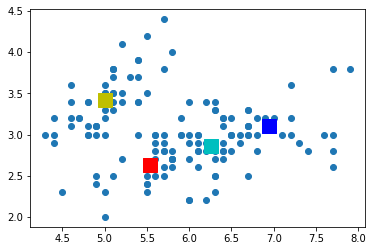

In [17]:
#Run this cell to see clusters being formed for pairs of features. Make sure to have as many colors as k and you have used similar naming of variables (update the cell below if not).
plt.scatter(data=X, x='SepalLengthCm', y='SepalWidthCm')
colors = ['r', 'y', 'b', 'c', 'm', 'g', 'k', 'w','orange']
for i, coor in enumerate(Kmean.cluster_centers_):
  plt.scatter(coor[0], coor[1], s=200, c=colors[i], marker='s')
plt.show()

### Experimentation

We chose an arbitrary value of k for the above experiment. In the lecture videos, we saw that elbow method is one of the ways to make a better guess for the value of k, although not always useful.

In [18]:
#Run this cell. Make sure you update the variable names if required.
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 10): #Specify for which values of k you want to try
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    Kmean.fit(X)
    wcss.append(Kmean.inertia_)

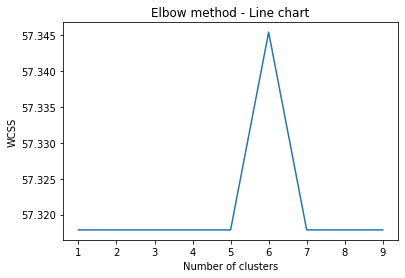

In [20]:
#Run this cell
plt.plot(range(1, 10), wcss) #Specify for which values of k you want to try
plt.title('Elbow method - Line chart')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

#### 1.8 Based on the videos, what can you infer from the elbow graph created? what should be a good value of k (number of clusters)? [0.5 pt]

The graph does not show an elbow shape, but from the lecture videos, we can infer that a good value of k to determine the optimal number of clusters is the value of k at the “elbow”. This is the point after which WCSS start decreasing in a linear fashion. 

## Part 2: Regression (Consumer Goods Data and Investments Data)

We will perform linear regression to use our financial data to predict projected investments.

### 2.1 Datasets
We'll be using the a merged [dataset](https://drive.google.com/file/d/17tyrmrUQYaiia3zY6YgQy8LIUuM37hrd/view?usp=sharing) consisting of consumer_goods and investments and try to predict the Percentage Investment using Linear Regression. The dataset can be found here. Load this dataset into a dataframe `goods_investments` and have a look at it using head, info and describe methods. [0.5 pt]<br>
<br><br>


In [18]:
good_investments = pd.read_csv('goods_investments.csv')#ToDo

### 2.2 Train and test split [1 pt]
1. Shuffle your data (optional)
2. Partition it into an 80%/20% train/test split using train_test_split.<br>

Note: The store number column would not likely contribute towards a prediction. Hence, it would be better to drop the column before splitting.

X_train and X_test should have these columns: `Convenience`, `Shopping`, `Specialty`, `Unsought`, `Other`<br>
y_train and y_test should have this column: `Percentage Investment`<br>
<br><br> 


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

In [20]:
del good_investments['Store Number'] #ToDo

In [21]:
X = good_investments.drop(columns = ['Percentage Investment'])
y = good_investments['Percentage Investment']

X_train, X_test , y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state= 0)

#### 2.3 Print out the shapes of X_train, X_test, y_train, y_test [0.5 pt]

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3708, 5)
(928, 5)
(3708,)
(928,)


#### 2.4 Fit a regressor

Create a <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">linear regression model</a> and fit it to your training dataset. [0.5 pt]<br>


In [23]:
Lin_reg = LinearRegression() 
Lin_reg.fit(X_train, y_train)

LinearRegression()

#### 2.5 Use your model to predict on your test set. [0.5 pt]


In [24]:
predictions = Lin_reg.predict(X_test)

#### 2.6 Report the RMSE of the prediction. (The [MSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) library is useful. Note - We want to find the root of MSE). [0.5 pt]

In [25]:
rmse = sqrt(mean_squared_error(predictions, y_test))

#### 2.7 Print the intercept value of the linear regression, along with the coefficients of each of the input features. [1 pt]

In [26]:
print("coefficients ->" , Lin_reg.coef_)

coefficients -> [ 5.33393119e-05  1.98406363e-04 -6.29195409e-05 -8.21475100e-05
 -7.70129178e-06]


In [27]:
for i,name in enumerate (X.columns): 
    print(f' {name: >10} : {Lin_reg.coef_[i] }' )

 Convenience : 5.333931189969148e-05
   Shopping : 0.0001984063628381367
  Specialty : -6.291954093917769e-05
   Unsought : -8.214750999926725e-05
      Other : -7.701291775003021e-06
